In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

#default plotting style
plt.style.use("fivethirtyeight")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
pd.set_option("display.max_columns", 500)

##Project with Fred API and pandas analysis

So let's install the FRED api trough PIP

In [2]:
#!pip install fredapi
from fredapi import Fred
fred_key="e332752b65b33aa5b2f95460fd34e9f4"

## Let's create the Fred object and get the data we want


In [3]:
fred=Fred(api_key=fred_key)

unrate=fred.get_series("UNRATE")




In [4]:
help(fred.search)

Help on method search in module fredapi.fred:

search(text, limit=1000, order_by=None, sort_order=None, filter=None) method of fredapi.fred.Fred instance
    Do a fulltext search for series in the Fred dataset. Returns information about matching series in a DataFrame.

    Parameters
    ----------
    text : str
        text to do fulltext search on, e.g., 'Real GDP'
    limit : int, optional
        limit the number of results to this value. If limit is 0, it means fetching all results without limit.
    order_by : str, optional
        order the results by a criterion. Valid options are 'search_rank', 'series_id', 'title', 'units', 'frequency',
        'seasonal_adjustment', 'realtime_start', 'realtime_end', 'last_updated', 'observation_start', 'observation_end',
        'popularity'
    sort_order : str, optional
        sort the results by ascending or descending order. Valid options are 'asc' or 'desc'
    filter : tuple, optional
        filters the results. Expects a tuple like

 we are tho more interested in taking data for each state. We can see that each usa country is indexed by a four letter code the state abbreviation and UR of Unemployment Rate, hence:

In [5]:
state_abbreviations = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA', 'HI','ID','IL',
                       'IN','IA','KS','KY','LA','ME','MD', 'MA','MI','MN','MS','MO','MT',
                       'NE','NV','NH','NJ', 'NM','NY','NC','ND','OH','OK','OR','PA','RI',
                       'SC', 'SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']


state_data = []
missing = []

for state in state_abbreviations:
    series_id = f"{state}UR"
    try:
        results = fred.get_series(series_id).to_frame(name=series_id)
        state_data.append(results)
        print(f"✓ {series_id}")
    except Exception:
        missing.append(series_id)
    time.sleep(0.5)

df_u = pd.concat(state_data, axis=1)

if missing:
    print("\nData missing for:", ", ".join(missing))


✓ ALUR
✓ AKUR
✓ AZUR
✓ ARUR
✓ CAUR
✓ COUR
✓ CTUR
✓ FLUR
✓ GAUR
✓ HIUR
✓ ILUR
✓ INUR
✓ IAUR
✓ KSUR
✓ KYUR
✓ LAUR
✓ MEUR
✓ MDUR
✓ MAUR
✓ MIUR
✓ MNUR
✓ MSUR
✓ MOUR
✓ MTUR
✓ NEUR
✓ NHUR
✓ NJUR
✓ NMUR
✓ NCUR
✓ NDUR
✓ OHUR
✓ OKUR
✓ ORUR
✓ PAUR
✓ SCUR
✓ SDUR
✓ TNUR
✓ TXUR
✓ UTUR
✓ VTUR
✓ VAUR
✓ WAUR
✓ WVUR
✓ WIUR
✓ WYUR

Data missing for: DEUR, IDUR, NVUR, NYUR, RIUR


We have, for API problems, 45 states out of 50

Now it's time to create a loop to extract all these time series:

In [6]:
df_u

,ALUR,AKUR,AZUR,ARUR,CAUR,COUR,CTUR,FLUR,GAUR,HIUR,ILUR,INUR,IAUR,KSUR,KYUR,LAUR,MEUR,MDUR,MAUR,MIUR,MNUR,MSUR,MOUR,MTUR,NEUR,NHUR,NJUR,NMUR,NCUR,NDUR,OHUR,OKUR,ORUR,PAUR,SCUR,SDUR,TNUR,TXUR,UTUR,VTUR,VAUR,WAUR,WVUR,WIUR,WYUR
1976-01-01,6.7,7.1,10.2,7.3,9.2,5.8,9.7,9.6,8.4,9.6,6.6,6.6,4.4,4.2,5.6,6.3,8.7,6.5,10.6,9.9,5.9,6.6,6.0,5.9,3.2,6.5,10.2,8.6,6.5,3.5,8.1,5.8,9.5,8.1,7.3,3.3,6.0,5.8,5.8,8.5,6.0,8.5,7.4,5.8,4.1
1976-02-01,6.6,7.1,10.2,7.3,9.2,5.8,9.7,9.7,8.4,9.6,6.6,6.6,4.4,4.2,5.6,6.3,8.7,6.5,10.6,9.9,5.9,6.6,6.0,5.9,3.2,6.5,10.2,8.6,6.5,3.5,8.1,5.8,9.5,8.1,7.3,3.3,6.0,5.8,5.9,8.5,6.0,8.5,7.4,5.8,4.1
1976-03-01,6.6,7.0,10.2,7.3,9.1,5.7,9.7,9.6,8.3,9.6,6.6,6.5,4.4,4.2,5.6,6.3,8.6,6.5,10.6,9.9,5.8,6.6,6.0,5.9,3.2,6.5,10.2,8.6,6.5,3.5,8.1,5.8,9.4,8.1,7.3,3.3,6.0,5.9,5.8,8.6,6.0,8.5,7.4,5.8,4.1
1976-04-01,6.5,7.0,10.0,7.2,9.0,5.6,9.6,9.5,8.2,9.4,6.6,6.3,4.3,4.2,5.6,6.4,8.6,6.5,10.4,9.8,5.7,6.4,6.0,5.9,3.1,6.5,10.3,8.6,6.3,3.6,7.9,5.7,9.3,8.1,7.1,3.2,6.0,5.9,5.8,8.5,5.9,8.5,7.4,5.7,4.0
1976-05-01,6.4,7.0,9.8,7.1,8.9,5.6,9.4,9.3,8.1,9.3,6.6,6.0,4.2,4.2,5.5,6.5,8.5,6.6,10.1,9.6,5.6,6.3,6.0,5.9,3.0,6.5,10.3,8.6,6.1,3.6,7.8,5.7,9.1,8.1,7.0,3.1,5.9,6.0,5.7,8.5,5.8,8.5,7.4,5.6,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,3.3,4.7,4.1,3.7,5.3,4.8,3.7,3.7,3.6,2.9,4.8,3.9,3.5,3.8,5.2,4.4,3.5,3.1,4.6,5.5,3.2,4.0,3.9,2.7,3.0,3.1,4.8,4.3,3.7,2.6,4.9,3.2,4.7,3.9,4.2,1.8,3.5,4.1,3.1,2.6,3.3,4.4,3.8,3.3,3.3
2025-05-01,3.3,4.7,4.1,3.7,5.3,4.8,3.8,3.7,3.5,2.8,4.8,3.7,3.6,3.8,5.0,4.5,3.4,3.2,4.8,5.4,3.3,4.0,4.0,2.8,3.0,3.1,4.8,4.2,3.7,2.5,4.9,3.1,4.8,3.9,4.1,1.8,3.5,4.1,3.2,2.6,3.4,4.5,3.7,3.3,3.3
2025-06-01,3.2,4.7,4.1,3.7,5.4,4.7,3.8,3.7,3.5,2.8,4.6,3.6,3.7,3.8,4.9,4.5,3.3,3.3,4.8,5.3,3.3,4.0,4.0,2.8,3.0,3.1,4.9,4.2,3.7,2.5,4.9,3.1,4.9,4.0,4.1,1.8,3.5,4.0,3.2,2.6,3.5,4.5,3.7,3.2,3.3
2025-07-01,3.0,4.8,4.1,3.7,5.5,4.5,3.8,3.7,3.4,2.7,4.6,3.6,3.7,3.8,4.9,4.5,3.2,3.4,4.8,5.3,3.5,3.9,4.1,2.8,3.0,3.1,4.9,4.2,3.7,2.5,5.0,3.1,4.9,4.0,4.2,1.9,3.6,4.0,3.3,2.6,3.6,4.5,3.7,3.1,3.3


In [7]:
px.line(df_u)

This is a nice visualization of the unemployment time series for all states with a selectable legend and interactive lines!
A clearly interesting moment is the may 2020. We can have a clearer view with a bar plot, zooming on that month.

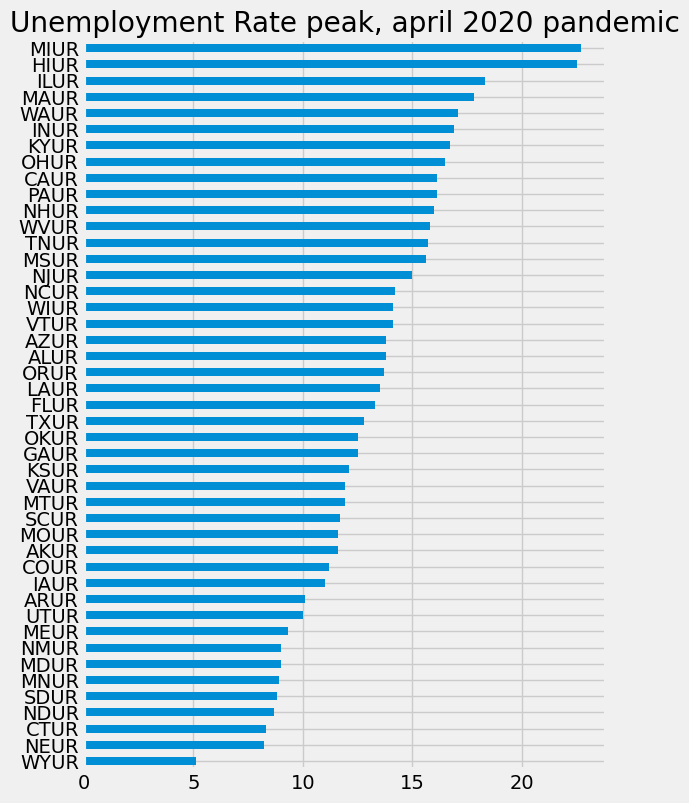

In [8]:
bar_info=df_u.loc[df_u.index=='2020-04-01'].T.sort_values("2020-04-01")
bar_plot=bar_info.plot(kind="barh", figsize=(6,9), title = "Unemployment Rate peak, april 2020 pandemic")
bar_plot.legend().remove()

We want to do the same with partecipation rate. This time I will try to use the search function and get series from there

In [9]:
part_df = fred.search('Labor Force Participation Rate in state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df[part_df['id'].str.len() <= 7]



This time is all of them!

In [10]:

from urllib.error import URLError

# Map IDs → State names
part_id_to_state = (
    part_df
    .set_index("id")["title"]   # replace "id_column" with the actual column name that holds IDs
    .str.replace("Labor Force Participation Rate for ", "")
    .to_dict()
)

all_results = []
max_retries = 3

for myid in part_df.index:   # or part_df["id_column"]
    for attempt in range(max_retries):
        try:
            results = fred.get_series(myid)
            results = results.to_frame(name=myid)
            all_results.append(results)
            time.sleep(0.5)
            break
        except URLError as e:
            print(f"Attempt {attempt + 1} failed for {myid}: {e}")
            if attempt < max_retries - 1:
                time.sleep(2)
                continue
            else:
                print(f"Failed to fetch {myid} after {max_retries} attempts")

# Combine into one DataFrame
part_states = pd.concat(all_results, axis=1)

# Rename columns to state names
part_states.columns = [part_id_to_state[c] for c in part_states.columns]


Attempt 1 failed for LBSSA22: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>
Attempt 1 failed for LBSSA09: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>
Attempt 1 failed for LBSSA02: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>
Attempt 1 failed for LBSSA16: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>


In [19]:
part_states

,Labor Force Participation Rate,California,Alabama,Georgia,Louisiana,Mississippi,Texas,Massachusetts,Kentucky,New York,Arizona,North Carolina,Virginia,Arkansas,Pennsylvania,West Virginia,New Mexico,Maryland,Michigan,Ohio,Connecticut,Iowa,South Dakota,Florida,Wisconsin,Minnesota,Illinois,Oklahoma,Oregon,Nevada,Washington,Missouri,Colorado,Nebraska,New Jersey,Utah,Tennessee,Indiana,Alaska,South Carolina,Maine,New Hampshire,Montana,District Of Columbia,Rhode Island,Vermont,Hawaii,Kansas,Idaho,North Dakota,Delaware,Wyoming
1948-01-01,58.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-02-01,58.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-03-01,58.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-05-01,58.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,62.6,62.2,58.0,60.8,57.9,56.2,64.9,66.7,58.4,61.0,61.5,59.6,65.4,58.4,61.6,54.3,57.8,64.8,62.0,62.7,65.0,67.2,68.9,58.0,65.5,68.2,64.9,62.7,62.7,62.9,62.7,63.4,67.8,69.2,63.9,68.2,59.7,63.7,65.2,57.5,60.1,65.7,62.3,72.4,63.8,65.1,60.5,67.1,63.6,69.5,58.9,62.5
2025-05-01,62.4,62.3,58.0,60.7,57.9,56.2,64.9,66.9,58.4,61.0,61.4,59.5,65.2,58.4,61.6,54.3,57.8,64.8,61.9,62.7,65.0,67.3,68.8,57.9,65.3,68.2,64.7,62.7,62.7,63.0,62.5,63.5,67.7,69.3,63.8,68.1,59.8,63.7,65.2,57.5,60.0,65.7,62.2,72.2,63.7,65.0,60.6,67.0,63.5,69.5,59.0,62.2
2025-06-01,62.3,62.4,58.0,60.6,58.0,56.0,64.8,66.9,58.4,60.9,61.4,59.4,65.0,58.4,61.5,54.3,57.8,64.7,61.7,62.7,64.8,67.4,68.8,57.8,65.1,68.2,64.6,62.7,62.7,63.0,62.3,63.5,67.7,69.4,63.7,68.0,59.8,63.7,65.2,57.6,59.9,65.6,62.1,72.1,63.6,64.9,60.6,67.0,63.4,69.5,58.9,62.0
2025-07-01,62.2,62.4,57.9,60.6,58.0,55.9,64.7,66.9,58.3,60.9,61.4,59.3,64.9,58.4,61.4,54.3,57.8,64.7,61.6,62.6,64.7,67.4,68.7,57.8,65.0,68.1,64.4,62.7,62.8,62.9,62.1,63.5,67.6,69.4,63.6,67.8,59.9,63.7,65.2,57.7,59.8,65.5,62.1,71.9,63.6,64.7,60.5,66.9,63.2,69.4,59.0,61.8


<Axes: >

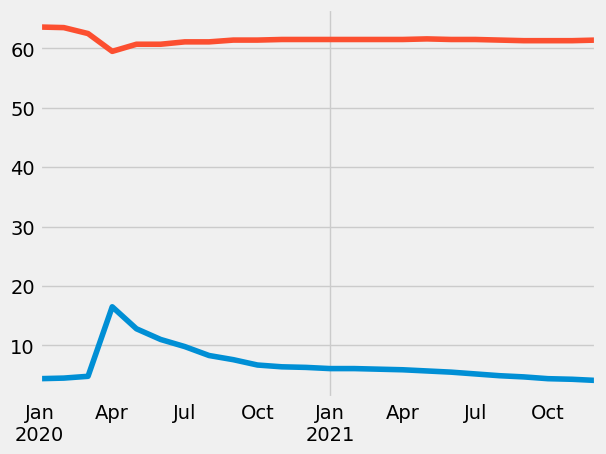

In [ ]:
df_u.query('index >=2020 and index <2022')['OHUR'].plot()
part_states.query('index >=2020 and index <2022')['Ohio'].plot()